In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# Import the september dataset
sept=pd.read_csv('/Users/ildem/Desktop/Project_8/uber-sep.csv')

In [11]:
# Take a 1% sample (~10 000 rows)
sept_s1=sept.sample(frac=0.01)

In [12]:
sept_s1.to_csv('/Users/ildem/Desktop/Project_8/sept_s1.csv')

In [13]:
# Take only Lat and Lon columns into a new data frame
data_s1=sept_s1[['Lat', 'Lon']]

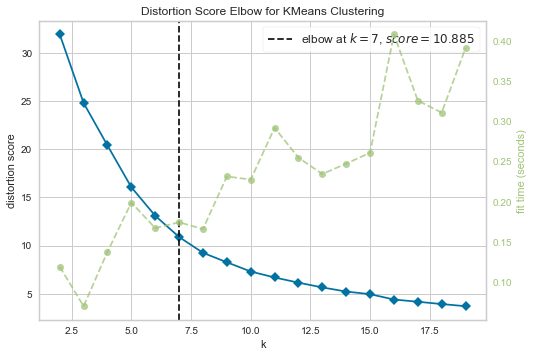

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Elbow Visualizer
model=KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,20))
visualizer.fit(data_s1)
visualizer.poof()

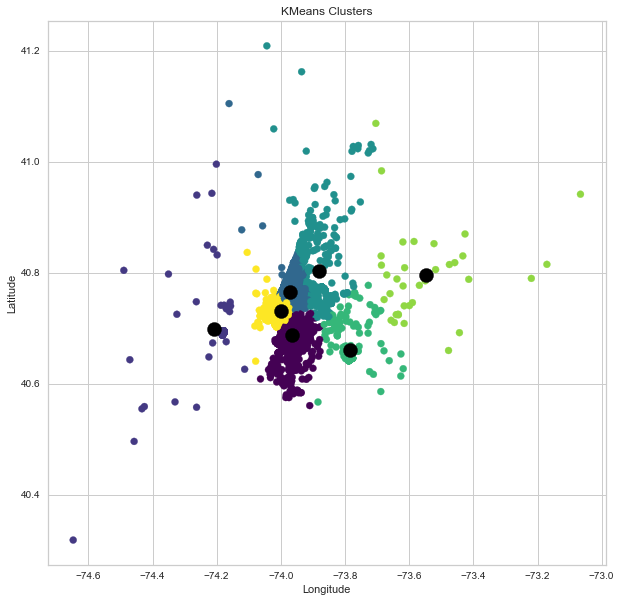

In [19]:
# Clustering with KMeans 
kmeans = KMeans(n_clusters=7).fit(data_s1)
y_kmeans = kmeans.predict(data_s1)
centers=kmeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(data_s1.Lon, data_s1.Lat, c=y_kmeans, cmap='viridis_r')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200)
plt.title('KMeans Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
print('Silhouette score for KMeans is', silhouette_score(data_s1, kmeans.labels_))
print('Davies-Bouldin score for KMeans is', davies_bouldin_score(data_s1, kmeans.labels_))

Silhouette score for KMeans is 0.4364756926040976
Davies-Bouldin score for KMeans is 0.7100366259132744


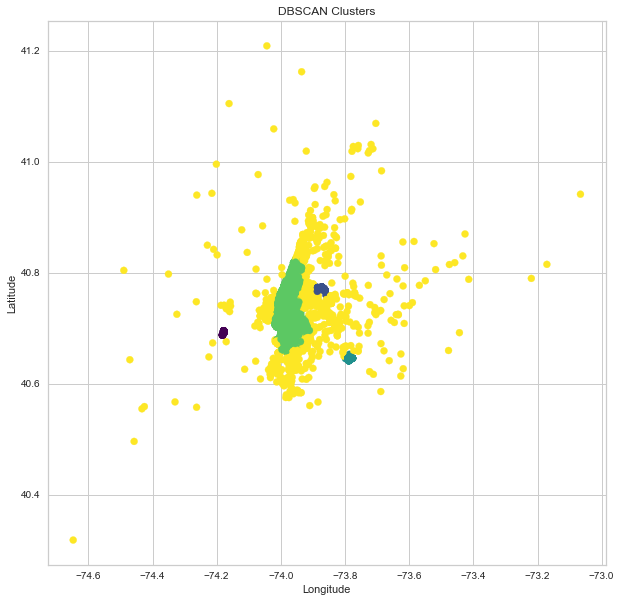

In [38]:
# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=50, n_jobs=-1)
y_dbscan = dbscan.fit_predict(data_s1)

plt.figure(figsize=(10, 10))
plt.scatter(data_s1.Lon, data_s1.Lat, c=y_dbscan, cmap='viridis_r')
plt.title('DBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [39]:
print('Silhouette score for DBSCAN is', silhouette_score(data_s1, dbscan.labels_))
print('Davies-Bouldin score for DBSCAN is', davies_bouldin_score(data_s1, dbscan.labels_))

Silhouette score for DBSCAN is 0.5625881600671258
Davies-Bouldin score for DBSCAN is 1.668859726596165


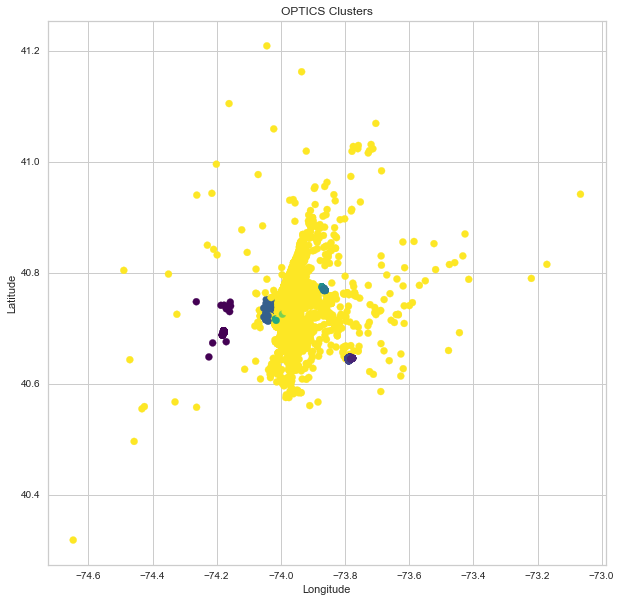

In [48]:
# Clustering with OPTICS
optics = OPTICS(min_samples=50)
y_optics=optics.fit_predict(data_s1)

plt.figure(figsize=(10, 10))
plt.scatter(data_s1.Lon, data_s1.Lat, c=y_optics, cmap='viridis_r')
plt.title('OPTICS Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [47]:
print('Silhouette score for OPTICS is', silhouette_score(data_s1, optics.labels_))
print('Davies-Bouldin score for OPTICS is', davies_bouldin_score(data_s1, optics.labels_))

Silhouette score for OPTICS is -0.1817979768870143
Davies-Bouldin score for OPTICS is 1.8603883297809332


In [49]:
# Clustering with Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_agglo=agglo.fit_predict(data_s1)

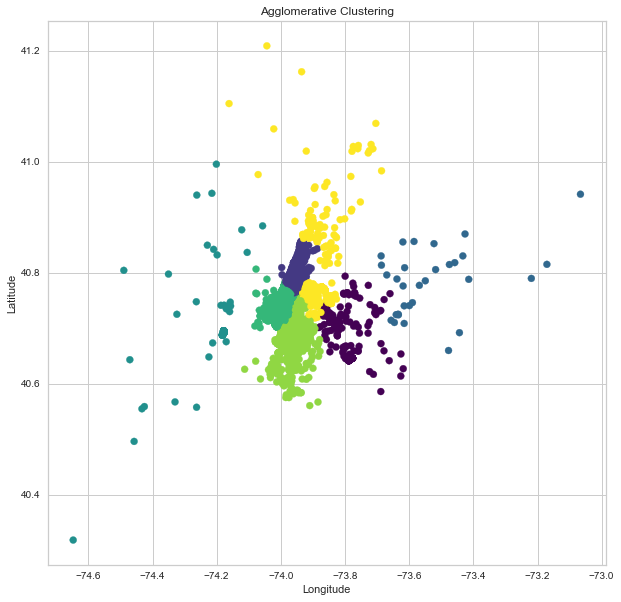

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(data_s1.Lon, data_s1.Lat, c=y_agglo, cmap='viridis_r')
plt.title('Agglomerative Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [52]:
print('Silhouette score for Agglomerative Clustering is', silhouette_score(data_s1, agglo.labels_))
print('Davies-Bouldin score for Agglomerative Clustering is', davies_bouldin_score(data_s1, agglo.labels_))

Silhouette score for Agglomerative Clustering is 0.4040927577301185
Davies-Bouldin score for Agglomerative Clustering is 0.7832043232741579
